In [1]:
import pandas as pd
import numpy as np

In [2]:
# The dataset with Product Category Info
df_cat = pd.read_csv('D:/Purdue-MSBAIM/Module3/Industry Practicum/Data/Supplementary Data-selected/UPC_Data.csv')
# The dataset we are going to use (with image input)
df_image = pd.read_csv('D:/Purdue-MSBAIM/Module3/Industry Practicum/Data/UPCImages.csv')

In [4]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808985 entries, 0 to 808984
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ItemSku               808985 non-null  int64 
 1   UPCTypeName           808985 non-null  object
 2   ItemPrimaryIndicator  808985 non-null  object
 3   ProductStatusnote     808985 non-null  object
 4   ProductName           808985 non-null  object
 5   MarketingName         331279 non-null  object
 6   MarketingDetails      330009 non-null  object
 7   MarketingFeatures     323791 non-null  object
 8   L6_Name               808985 non-null  object
 9   L5_Name               808985 non-null  object
 10  L4_Name               808985 non-null  object
 11  L3_Name               808985 non-null  object
 12  L2_Name               808985 non-null  object
 13  L6_Code               808985 non-null  object
 14  L5_Code               808985 non-null  object
 15  L4_Code          

In [4]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891704 entries, 0 to 891703
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UpdatedDate              891704 non-null  object
 1   ItemSku                  891704 non-null  int64 
 2   ItemDocumentNote         891704 non-null  object
 3   ItemImageApprovalDate    891704 non-null  object
 4   ItemImageExpirationDate  891704 non-null  object
 5   ItemImageActiveDate      891704 non-null  object
 6   ItemDocumentValue        336662 non-null  object
dtypes: int64(1), object(6)
memory usage: 47.6+ MB


In [3]:
# Left Join them based on ItemSku,so we keep everything in our image dataset.  And there are 3872 product with no category
# we can ignore them, these indicate that there are some product in the image dataset that's not existed on the Category dataset
df = df_image.merge(df_cat,on='ItemSku',how='left')
df['L6_Name'].isnull().sum()

3872

In [6]:
# Based on L6, there are 11 different types of product(not considering the null value)
L6 = df['L6_Name'].dropna().nunique()
L6

11

In [5]:
L6 = df['L6_Name'].dropna().value_counts(normalize=True)
L6

HARDLINES AND HOME        0.270654
HEALTH AND BEAUTY         0.264500
GROCERY                   0.233509
PETS AND CONSUMABLES      0.139401
FRESH                     0.036249
SOFTLINES                 0.035212
GAS STATION               0.018408
PRESCRIPTIONS             0.001454
MISC.                     0.000585
SUPPLIES AND PACKAGING    0.000018
SYSTEM                    0.000009
Name: L6_Name, dtype: float64

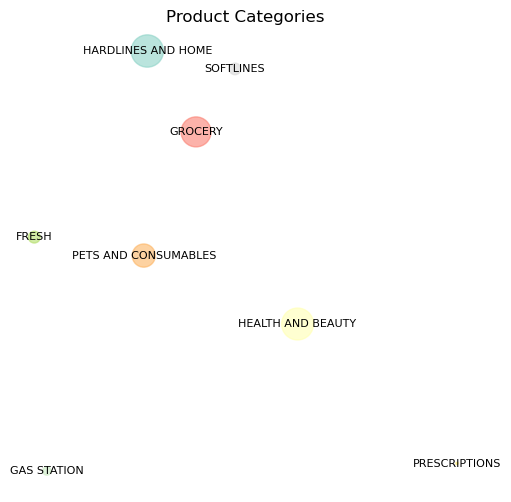

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'df' is your DataFrame and you've calculated 'L6' as shown
L6 = df['L6_Name'].dropna().value_counts(normalize=True).head(8)

# Convert to DataFrame for easier plotting
L6_df = pd.DataFrame({'Category': L6.index, 'Percentage': L6.values})

# Set the color palette
colors = plt.get_cmap('Set3')(np.linspace(0, 1, len(L6_df)))

# More constrained random positions for each bubble
np.random.seed(0)  # For reproducibility
x = np.random.rand(len(L6_df)) * 0.6 + 0.2  # Random values between 0.2 and 0.8
y = np.random.rand(len(L6_df)) * 0.6 + 0.2

# Create the bubble plot
plt.figure(figsize=(6, 6))
scatter = plt.scatter(x, y, s=L6_df['Percentage']*2000, c=colors, alpha=0.6)  # Adjusted bubble size

# Add labels
for i, row in L6_df.iterrows():
    plt.text(x[i], y[i], row['Category'], ha='center', va='center', fontsize=8)

plt.axis('off')  # Turn off the axis
plt.title('Product Categories', fontsize=12)

# Show the plot
plt.show()


C:\Users\Jensen R\AppData\Local\Temp\ipykernel_10884\1281704587.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = L6_df.pivot("Dummy", "Category", "Percentage")


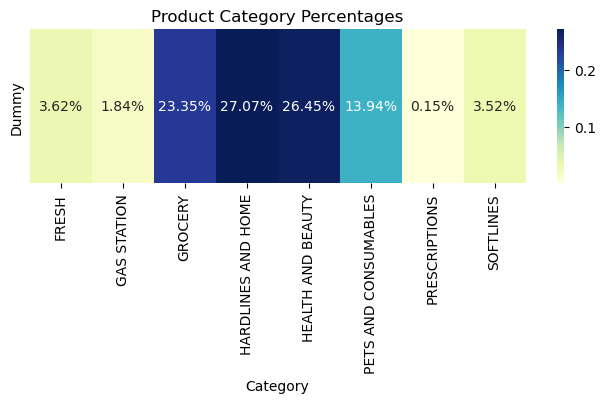

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame and you've calculated 'L6' as shown
L6 = df['L6_Name'].dropna().value_counts(normalize=True).head(8)

# Convert to DataFrame
L6_df = pd.DataFrame({'Category': L6.index, 'Percentage': L6.values})

# We'll create a dummy variable for the heatmap's y-axis
L6_df['Dummy'] = 'Percentage'

# Pivot the DataFrame to create a matrix-like structure
heatmap_data = L6_df.pivot("Dummy", "Category", "Percentage")

# Create the heatmap
plt.figure(figsize=(8, 2))  # Adjust the size as needed
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2%")

# Adjust y-axis label
plt.yticks([])  # Hides the y-axis labels
plt.title("Product Category Percentages")
plt.show()

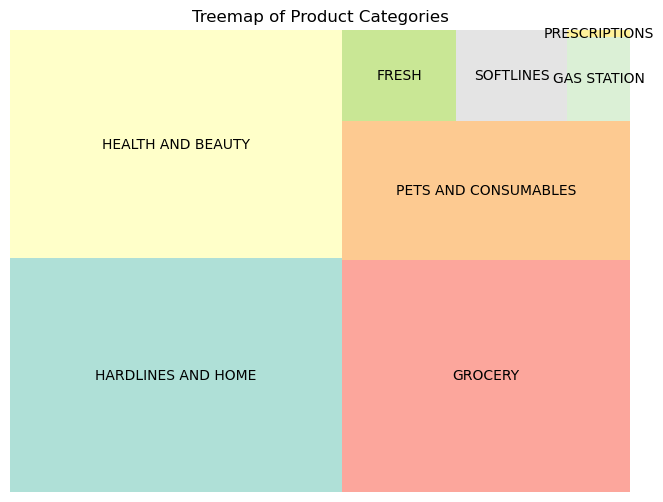

In [10]:
import matplotlib.pyplot as plt
import squarify
import pandas as pd

# Assuming 'df' is your DataFrame and you've calculated 'L6' as shown
L6 = df['L6_Name'].dropna().value_counts(normalize=True).head(8)

# Convert to DataFrame
L6_df = pd.DataFrame({'Category': L6.index, 'Percentage': L6.values})

# Normalize the sizes to fit the area (1x1 square)
sizes = L6_df['Percentage'].values * 100  # Convert percentages to values suitable for squarify

# Define a color palette
colors = plt.cm.Set3(np.linspace(0, 1, len(L6_df)))

# Create the Treemap
plt.figure(figsize=(8, 6))
squarify.plot(sizes=sizes, label=L6_df['Category'], color=colors, alpha=0.7)

# Remove axis for a cleaner look
plt.axis('off')

# Add a title
plt.title("Treemap of Product Categories")

# Show the plot
plt.show()

In [8]:
# L5 is a more granulated classification, it generates more category
L5 = df['L5_Name'].dropna().nunique()
L5

46

In [9]:
L5 = df['L5_Name'].dropna().value_counts()
L5

BEAUTY CARE                  123992
DRY GROCERY                  109864
OTC HEALTH CARE               84040
HARD HOME                     69216
GROCERY DSD                   54256
PETS                          46032
TOYS                          38840
SCHOOL HOME OFFICE            37576
DO IT YOURSELF                30816
SPORTING GOODS                27880
FROZEN FOODS                  27808
CONSUMABLES                   25920
HOME TEXTILES                 23112
AUTOMOTIVE                    23000
BABY                          22176
DAIRY                         18144
CONVENIENCE STORE             16608
ELECTRONICS                   14824
ENTERTAINMENT                 14624
GARDEN                        13152
SHOES                         10704
CARD AND PARTY                 8424
PRODUCE                        8240
DELI                           7912
PACKAGED MEAT                  7128
MENS                           6224
JEWELRY AND ACCESSORIES        5992
KIDS                        

In [10]:
# The rest of the classification is even more granulated, there is no reason to do that...
L4 = df['L4_Name'].nunique()
L4

165

In [11]:
L3 = df['L3_Name'].nunique()
L3

588

In [12]:
L2 = df['L2_Name'].nunique()
L2

3224

## I suggest we just use L6 or L5 to do the categorization, so there will be 11 types/46 types of product

In [13]:
#############################################################################################################

## Here let's say we are going to use L6 to categorize the product, so there will be 11 types of product, we are going to use the first 8 types of product with front view image, because the 9th~11th ones contains not enough product to take sample from.  And random extract 5 products(With Image Links) from each type of product. So in total there are 40 products from 8 different categories as sample.

In [9]:
# Filter the DataFrame to include only rows where 'ItemDocumentValue' is not null
# and 'ItemDocumentNote' equals "upc_img_pth_frnt" so we use picture only from the Front side
df_filtered = df[(df['ItemDocumentValue'].notnull()) & (df['ItemDocumentNote'] == "upc_img_pth_frnt")&
                 (df['ItemDocumentValue'].str.startswith("http://static"))]

# Get the unique categories from L6_Name column
unique_categories = df_filtered['L6_Name'].dropna().unique()
df_filtered['L6_Name'].value_counts()

HARDLINES AND HOME        24774
HEALTH AND BEAUTY         23402
GROCERY                   18753
PETS AND CONSUMABLES      12069
FRESH                      2935
SOFTLINES                  2565
GAS STATION                1631
PRESCRIPTIONS               160
MISC.                        66
SUPPLIES AND PACKAGING        2
SYSTEM                        1
Name: L6_Name, dtype: int64

In [10]:
# Filter the DataFrame to include only rows where 'ItemDocumentValue' is not null,
# 'ItemDocumentNote' equals "upc_img_pth_frnt", and 'ItemDocumentValue' starts with "http://static"
df_filtered = df[(df['ItemDocumentValue'].notnull()) & 
                 (df['ItemDocumentNote'] == "upc_img_pth_frnt") & 
                 (df['ItemDocumentValue'].str.startswith("http://static"))]

# Get the unique categories from L6_Name column
unique_categories = df_filtered['L6_Name'].dropna().unique()

# Consider all 11 categories (or adjust as needed)
all_categories = unique_categories[:8]

# Sample 5 products from each of these categories
sampled_products = pd.DataFrame()
for category in all_categories:
    sampled_category = df_filtered[df_filtered['L6_Name'] == category].sample(n=10, random_state=1)
    sampled_products = pd.concat([sampled_products, sampled_category], ignore_index=True)

# Save the sampled products to a CSV file
sampled_products.to_csv('sampled_products_10_each_img_front.csv', index=False)